# Baseball Historical Pitching Statistics Analysis
#### By: Michael Algarra
#### August 13th, 2021
In this analysis, I'm going to analyze the various team pitching attributes from the 1900's to now. This will be done using the pybaseball package from https://github.com/jldbc/pybaseball, which helps the automation of pulling from various baseball data sites: Fangraphs, Baseball Reference, and Baseball Savant.

<b>I will be looking into: team all time pitching statistics, and analyzing which major pitching statistic has the greatest effect on team success (Winning Percentage).</b>


In [2]:
# import packs
import pybaseball as pyball
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn import linear_model
import seaborn # this is for the graph coloring

# import data using pyball
teamPitch = pyball.team_pitching(1900,2021);


### Analyzing each Teams historic ERA
Taking the average of each teams ERA.

Start by looking at all the teams names we have currently.


In [3]:
team = np.unique(list(teamPitch['Team']))
print(list(team)) # show output as list 

['ANA', 'ARI', 'ATL', 'BAL', 'BKF', 'BOS', 'BRO', 'BSN', 'BUF', 'CAL', 'CHC', 'CHI', 'CHW', 'CIN', 'CLE', 'COL', 'CWH', 'DET', 'FLA', 'HOU', 'IND', 'KCA', 'KCP', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'MON', 'NWK', 'NYG', 'NYH', 'NYM', 'NYY', 'OAK', 'PHA', 'PHI', 'PIT', 'PRB', 'SDP', 'SEA', 'SFG', 'SLB', 'SLT', 'STL', 'TBD', 'TBR', 'TEX', 'TOR', 'WAS', 'WSN']


##### Understanding Data
So some of these abbreviations for teams are outdated, due to teams changing their abbreviations throughout history, let's simplify them so they are all the same. Referencing the old abbreviations from https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Baseball/Team_abbreviations.


In [4]:
modernTeam = []
for t in list(teamPitch['Team']):
    if t =='ANA' or t =='CAL' or t =='LAA':
        modernTeam.append('LAA')
    elif t =='BOA' or t =='BOB' or t =='BOR' or t =='BOD' or t =='BOU' or t =='BOS':
        modernTeam.append('BOS')
    elif t =='CHC' or t =='CHI' or t =='CHO':
        modernTeam.append('CHC')
    elif t =='MON' or t =='WAS' or t =='WSN':
        modernTeam.append('WSN')
    elif t =='STL' or t =='SLT':
        modernTeam.append('STL')
    elif t =='TBD' or t =='TBR':
        modernTeam.append('TBR')
    elif t =='PHA' or t =='PHI':
        modernTeam.append('PHI')
    elif t =='KCA' or t =='KCP' or t =='KCR':
        modernTeam.append('KCR')
    elif t =='MIA' or t =='FLA':
        modernTeam.append('MIA')
    elif t == 'NYG' or t == 'NYM' or t=='BRO':
        modernTeam.append('NYM')
    else:
        modernTeam.append(t)


teamPitch['Team'] = modernTeam
team = np.unique(list(teamPitch['Team']))

# let's list all the 30 actual modern teams from today, so we can filter out the cancelled teams
modern30 = ['NYY','BOS','BAL','TOR','TBR','MIN','CLE','DET','KCR','CHW','LAA','TEX','OAK','HOU','SEA',
            'PHI','NYM','ATL','MIA','WSN','STL','CHC','MIL','PIT','CIN','LAD','SDP','SFG','COL','ARI']


Let's now remove the team data for outdated teams that are extinct in the MLB.

In [5]:
# initial length
print("Initial Length:",len(teamPitch))

teamPitchNew = teamPitch[teamPitch.Team.isin(modern30)] # acquire just the defined modern 30 teams

# defunct teams removed
print("Filtered Length:",len(teamPitchNew))

Initial Length: 2610
Filtered Length: 2485


##### Analyze Data for each team
Let's see some summary average stats for each team.

    ERA: "Earned Run Average", 9 x earned runs / innings pitched
    FIP: Fielding Independant Pitching, ((HR x 13) + (3 x (BB + HBP)) - (2 x K)) / IP + FIP constant
    K/9: Strikeouts per 9 innings, 9 x total strikeouts / innings pitched
    H/9: Hits per 9 innings, 9 x total hits given up / innings pitched
    HR/9: Home Runs per 9 innings, 9 x total home runs given up / innings pitched

In [6]:
teamPitchNew[["Team","ERA","FIP","K/9","H/9","HR/9","W","L"]].groupby("Team").mean()

,ERA,FIP,K/9,H/9,HR/9,W,L
Team,,,,,,,
ARI,4.295000,4.258333,7.620417,8.932917,1.140833,76.000000,79.833333
ATL,3.833750,3.862857,6.375000,8.734643,0.850536,80.839286,75.928571
BAL,4.052222,4.082639,5.651250,8.864028,0.933056,78.027778,77.944444
BOS,3.922727,3.812562,5.069256,9.056942,0.692066,80.090909,74.338843
CHC,3.732623,3.749836,5.158689,8.876885,0.693033,77.942623,76.491803
CHW,3.782397,3.828926,4.810744,8.890744,0.689752,77.570248,76.752066
CIN,3.763934,3.789918,4.876230,8.950082,0.696475,77.163934,77.377049
CLE,3.831240,3.792066,5.060496,8.962893,0.669091,78.966942,75.181818
COL,4.999310,4.655172,6.671724,9.756897,1.177586,72.758621,82.000000


##### Data Visualization
Let's show a visualization based on the ERA statistic, to display any trends over time.

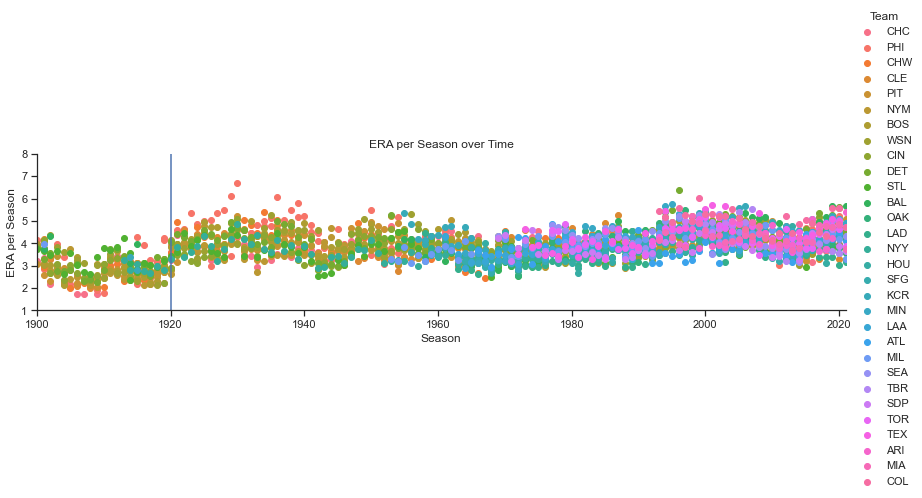

In [17]:
# plot avg. SO/game over time
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=teamPitchNew, hue='Team', aspect=4);
fg.map(plt.scatter, 'Season', 'ERA').add_legend();
plt.xlabel('Season');
plt.xlim(1900,2021);
plt.ylim(1.00,8.00);
plt.ylabel('ERA per Season');
plt.title('ERA per Season over Time');
plt.axvline([1920]);

##### Graph:
This displays the ERA colored by each team for each year since the year 1900. The vertical line at 1920 displays the division between the "dead ball era" and the "live ball era". The dead ball era was defined as an era where pitchers were more dominant and ERA was at an all time low.

You are able to see the team dots added over the years as the teams are added into the MLB.

### Is there a difference between pre 1920 ERA (Dead Ball era) and post 1920's ERA (Live Ball era)?
Now let's analyze graphically if there was a distinct difference in ERA between dead ball and live ball ERAs. This will be show by acquiring means and standard deviations, and displaying them in a boxplot.


The Dead Ball era's ERA was: 2.906901408450702 with a standard deviation of: 0.561716663450548
The Live Ball era's ERA is:, 4.0254338936846965 with a standard deviation of: 0.595351297159347


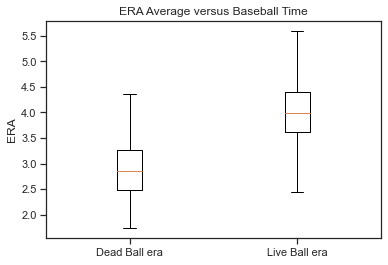

In [24]:
deadBall= teamPitchNew[teamPitchNew['Season']<=1920]
liveBall = teamPitchNew[teamPitchNew['Season']>1920]

# get average ERA's
print("The Dead Ball era's ERA was:",sum(deadBall["ERA"])/len(deadBall["ERA"]), 
      "with a standard deviation of:",np.std(deadBall["ERA"]))
print("The Live Ball era's ERA is:,",sum(liveBall["ERA"])/len(liveBall["ERA"]),
     "with a standard deviation of:",np.std(liveBall["ERA"]))
plt.boxplot([deadBall["ERA"],liveBall["ERA"]],sym='',labels=["Dead Ball era", "Live Ball era"]);
plt.ylabel('ERA');
plt.title('ERA Average versus Baseball Time');

##### Graph:
This box plot displays the spread of data between the two eras of baseball. Each time era has a similar standard deviation, <b>however each ERA is distinctly different between the two eras.</b> If the N value for the two time era's were the same, I would have run a t-test to determine the statistical difference between the means. This could have also been done via random sampling and/or a small defined time frame instead of 1900-1920 and 1920-2021.


### Multivariate Regression:
Now here's a question:
    
    Historically, what aspect of pitching, (ERA, FIP, K/9, H/9, HR/9) has the greatest affect on Win percentage?
Win percentage is calculated as:
    
    Win% = total wins/(total wins+total losses). 
Using a multivariate regression, I'm going to determine which had pitching statistic had the greatest affect in MLB history.



In [48]:
# sklearn provides a linear regression model
lr = linear_model.LinearRegression()

# we want to predict win loss percentage, which we define as Y
Xlabs = ["ERA","FIP","K/9","H/9","HR/9"] # array of strings for columns needed
X = teamPitchNew[Xlabs]
Y = teamPitchNew['W']/(teamPitchNew['L']+teamPitchNew['W'])


# fit the two values and acquire betas
model = lr.fit(X, Y)
betas = model.coef_
# This means the lower the HR/9 and ERA is the higher the Win percentage, The higher the FIP, the higher the win %.

for i in range(0,len(Xlabs)):
    print("The beta value for "+str(Xlabs[i]),"is:",str(betas[i]))


The beta value for ERA is: -0.17410961029605032
The beta value for FIP is: 0.12570979338578428
The beta value for K/9 is: 0.014472478736681811
The beta value for H/9 is: 0.02234724513817369
The beta value for HR/9 is: -0.028333538604276783


##### Multivariate Regression Analysis:
So what does this mean historically?

Using this, it is seen that each beta value coefficient generated from this analysis shows the "weight" that each variable has. You can interpret this by looking at the absolute value of each beta value with the maximum value being the variable in which has the most effect on the output variable. <strong>In this case, the variable with the strongest weight is ERA.</strong>

Because ERA has a negative beta value, it can be interpretted as an inversely proportional relationship. That meaning The lower the ERA, the higher the teams win percentage.

According to this data as well, you can conclude that the teams K/9 would have the least effect on the team winning percentage per year, due to it's small magnitude of beta value. 


<b>Findings: 
    Team ERA has the biggest impact on annual team success,
    Team K/9 has the least impact on annual team success</b>


